Datasets :- https://www.kaggle.com/datasets/camnugent/california-housing-prices

# STEP 1: IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: LOAD DATASET

In [3]:
df = pd.read_csv("./Datasets/California_Housing.csv")

# STEP 3: BASIC EDA

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
print(f"Shape: {df.shape}, (Rows: {df.shape[0]}, Columns: {df.shape[1]})")

Shape: (20640, 10), (Rows: 20640, Columns: 10)


In [8]:
# check Missing Values

missing_value = df.isnull().sum()
missing_percentage = (missing_value / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_value,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing Count"] > 0])

                Missing Count  Missing Percentage
total_bedrooms            207            1.002907


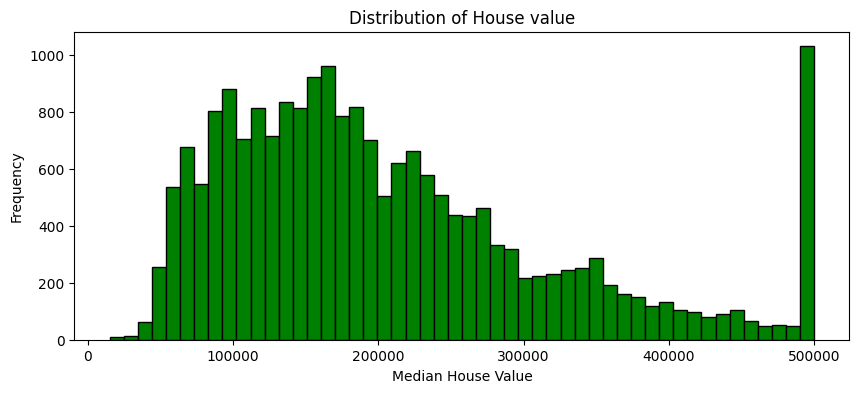

In [9]:
# Visulize Target Variable

plt.figure(figsize=(10,4))
plt.hist(df['median_house_value'], bins=50, color='green', edgecolor='black')
plt.title("Distribution of House value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
# Select Numerical Columns only

numerical_columns = df.select_dtypes(include=('float64', 'int64'))

numerical_columns.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [12]:
# Correlation Analysis with Numerical Features

corr = numerical_columns.corr()['median_house_value'].sort_values(ascending=False)
print(corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


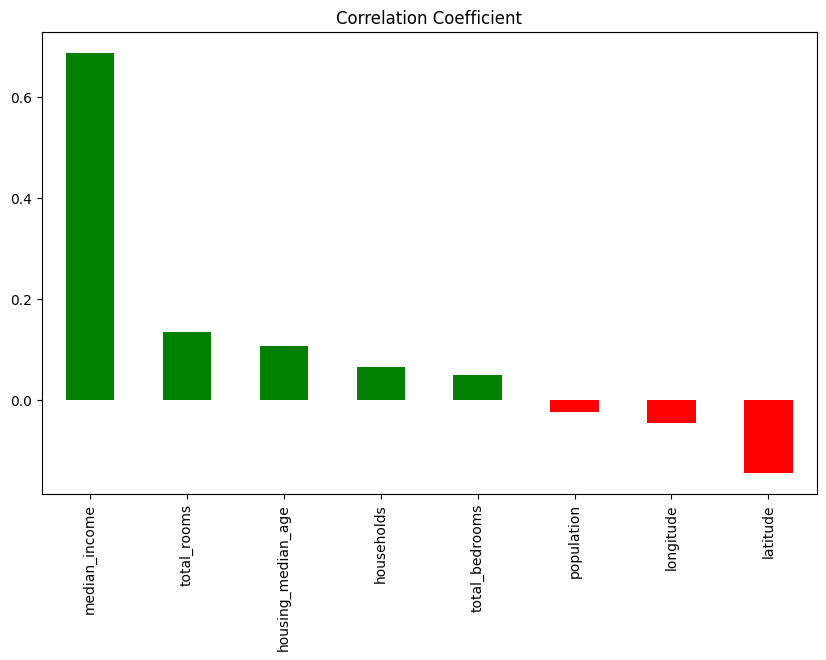

In [13]:
plt.figure(figsize=(10,6))
corr.drop('median_house_value').plot(kind='bar', color=['green' if x > 0 else 'red' for x in corr.drop('median_house_value')])
plt.title("Correlation with Median House Value")
plt.title("Correlation Coefficient")
plt.show()

# STEP 4: Handle Missing Values

In [14]:
# check missing values

missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing percentage": missing_percentage
})

print("Missing Values Before Fill with Median values")
print(missing_df[missing_df["Missing Count"] > 0])

Missing Values Before Fill with Median values
                Missing Count  Missing percentage
total_bedrooms            207            1.002907


In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [16]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Counts": missing,
    "Missing Percentage": missing_percentage
})

print("Missing Values Before Fill with Median values")
print(missing_df[missing_df['Missing Counts'] > 0])

Missing Values Before Fill with Median values
Empty DataFrame
Columns: [Missing Counts, Missing Percentage]
Index: []


# STEP 5: Feature Selection/Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1, errors='ignore')
y = df['median_house_value']

In [19]:
X.shape

(20640, 8)

In [20]:
y.shape

(20640,)

# STEP 6: Train/Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [23]:
X_train.shape

(16512, 8)

In [24]:
y_train.shape

(16512,)

In [25]:
X_test.shape

(4128, 8)

In [26]:
y_test.shape

(4128,)

In [27]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [28]:
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

# STEP 7: Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# STEP 8: Train SVR Model with Linear kernel

In [31]:
from sklearn.svm import SVR

In [32]:
model_linear = SVR(kernel='linear', C=100)
model_linear.fit(X_train_scaler, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [33]:
model_linear.score(X_test_scaler, y_test)

0.5845179146126923

In [34]:
y_pred = model_linear.predict(X_test_scaler)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
linear_mse = mean_squared_error(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"linear Mean Sqared Error: {linear_mse:.4f}")
print(f"linear Mean Absolute Error: {linear_mae:.4f}")
print(f"linear R2 Score: {linear_r2:.4f}")
print(f"linear RMSE: {linear_rmse:.4f}")

linear Mean Sqared Error: 5444514549.8978
linear Mean Absolute Error: 51443.7697
linear R2 Score: 0.5845
linear RMSE: 73786.9538


# STEP 9: SVR WITH RBF KERNEL

In [37]:
model_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
model_rbf.fit(X_train_scaler, y_train)

,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [38]:
y_pred_rbf = model_rbf.predict(X_test_scaler)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
rbf_mse = mean_squared_error(y_test, y_pred_rbf)
rbf_mae = mean_absolute_error(y_test, y_pred_rbf)
rbf_r2 = r2_score(y_test, y_pred_rbf)
rbf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rbf))

print(f"RBF Mean Squared Error: {rbf_mse}")
print(f"RBF Mean Absolute Error: {rbf_mae}")
print(f"RBF R2 Score: {rbf_r2}")
print(f"RBF RMSE: {rbf_rmse}")

RBF Mean Squared Error: 8996369066.590157
RBF Mean Absolute Error: 68318.7634390741
RBF R2 Score: 0.3134686028580992
RBF RMSE: 94849.19117520274


# STEP 10: SVR WITH POLYNOMIAL KERNEL

In [41]:
from sklearn.svm import SVR

In [42]:
model_poly = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
model_poly.fit(X_train_scaler, y_train)

,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [43]:
y_pred_poly = model_poly.predict(X_test_scaler)

In [58]:
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Poly Mean Squared Error: {poly_mse}")
print(f"Poly Mean Absolute Error: {poly_mae}")
print(f"Poly R2 Score: {poly_r2}")
print(f"Poly RMSE: {poly_rmse}")

Poly Mean Squared Error: 11636752239.835781
Poly Mean Absolute Error: 81834.46103778698
Poly R2 Score: 0.11197554099049134
Poly RMSE: 107873.77920438211


# STEP 10: MODEL COMPARISON

In [45]:
results = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'R² Score': [linear_r2, rbf_r2, poly_r2],
    'MAE': [linear_mae, rbf_mae, poly_mae],
    'RMSE': [linear_rmse, rbf_rmse, poly_rmse]
})

print("\n")
print(results.to_string(index=False))

best_idx = results['R² Score'].idxmax()
print(f"\n✓ Best Kernel (before tuning): {results.loc[best_idx, 'Kernel']}")



    Kernel  R² Score          MAE          RMSE
    Linear  0.584518 51443.769679  73786.953792
       RBF  0.313469 68318.763439  94849.191175
Polynomial  0.111976 81834.461038 107873.779204

✓ Best Kernel (before tuning): Linear


# STEP 11: HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [50]:
# REDUCED parameter grid for California Housing
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.1, 'scale'],
    'epsilon': [0.1, 0.5]
}

print(f"\nTesting {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['epsilon'])} combinations...")
print("Expected time: 5-10 minutes...")

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaler, y_train)

# Best parameters
print("\n--- Best Hyperparameters Found ---")
print(f"✓ Best C: {grid_search.best_params_['C']}")
print(f"✓ Best Gamma: {grid_search.best_params_['gamma']}")
print(f"✓ Best Epsilon: {grid_search.best_params_['epsilon']}")
print(f"✓ Best CV R² Score: {grid_search.best_score_:.4f}")

# Predict with best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaler)

tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("\n--- Tuned Model Performance (Test Set) ---")
print(f"R² Score: {tuned_r2:.4f}")
print(f"MAE: ${tuned_mae:.2f}")
print(f"RMSE: ${tuned_rmse:.2f}")


Testing 18 combinations...
Expected time: 5-10 minutes...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- Best Hyperparameters Found ---
✓ Best C: 100
✓ Best Gamma: 0.1
✓ Best Epsilon: 0.5
✓ Best CV R² Score: 0.2721

--- Tuned Model Performance (Test Set) ---
R² Score: 0.3135
MAE: $68318.68
RMSE: $94849.10


# STEP 12: CROSS-VALIDATION ON BEST MODEL

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
print("\n[STEP 6] Cross-Validation (5-Fold)...")
cv_scores = cross_val_score(
    grid_search.best_estimator_, 
    X_train_scaler, 
    y_train, 
    cv=5, 
    scoring='r2'
)
print(f"CV R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


[STEP 6] Cross-Validation (5-Fold)...
CV R² Scores: [0.26727481 0.27262344 0.26607696 0.2861269  0.2684484 ]
Mean CV R²: 0.2721 (+/- 0.0073)


# STEP 13: BEFORE vs AFTER TUNING COMPARISON

In [54]:
comparison = pd.DataFrame({
    'Model': ['SVR-RBF (Default)', 'SVR-RBF (Tuned)'],
    'R² Score': [rbf_r2, tuned_r2],
    'MAE': [rbf_mae, tuned_mae],
    'RMSE': [rbf_rmse, tuned_rmse]
})

print("\n")
print(comparison.to_string(index=False))

improvement = ((tuned_r2 - rbf_r2) / rbf_r2) * 100
print(f"\n✓ Improvement in R²: {improvement:.2f}%")




            Model  R² Score          MAE         RMSE
SVR-RBF (Default)  0.313469 68318.763439 94849.191175
  SVR-RBF (Tuned)  0.313470 68318.683524 94849.098831

✓ Improvement in R²: 0.00%


# STEP 14: VISUALIZATIONS


[STEP 7] Generating Visualizations...


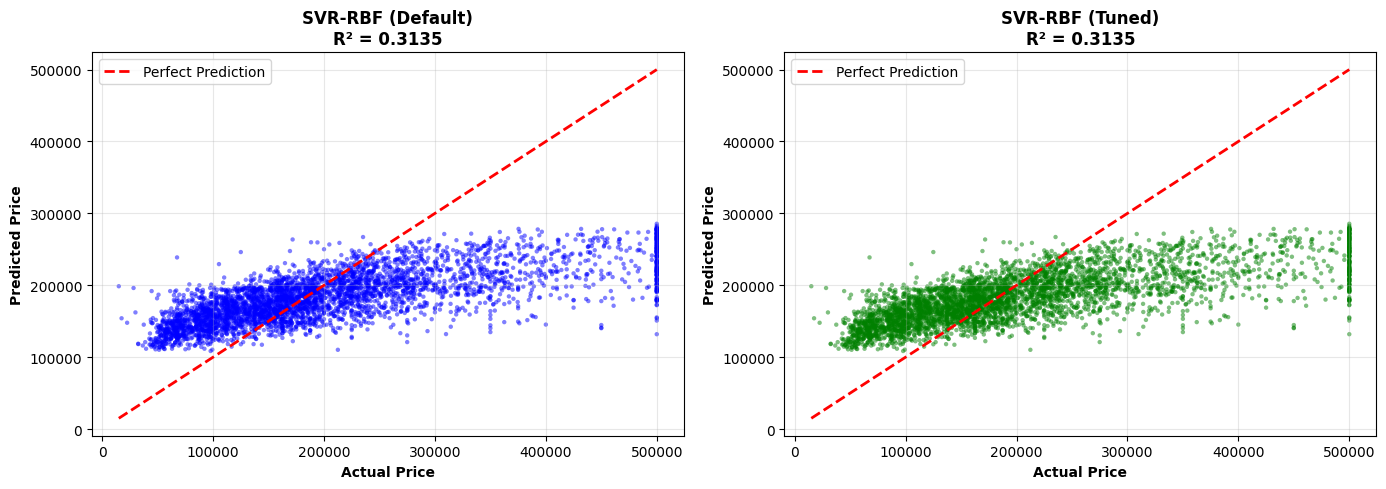

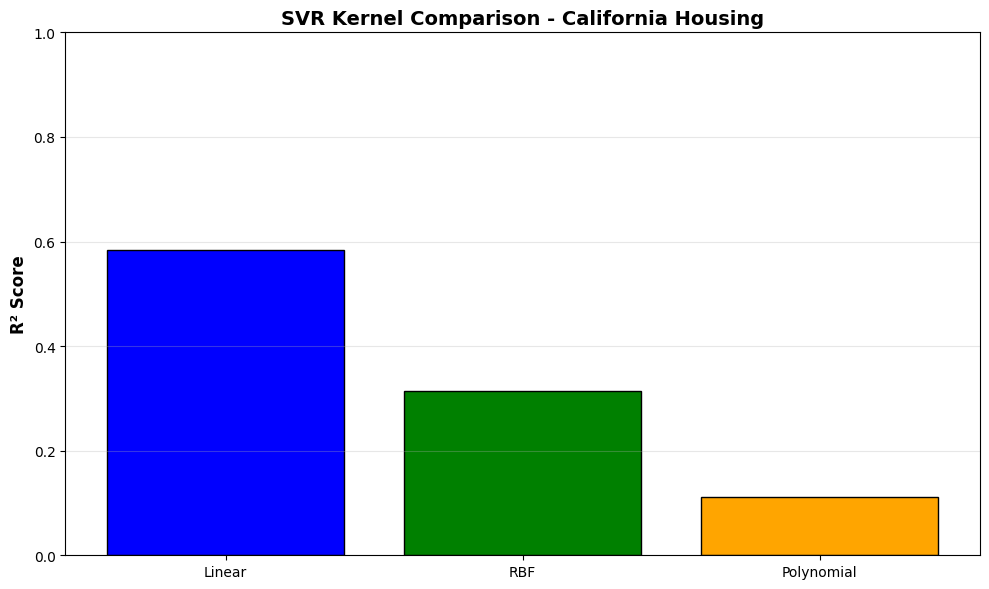

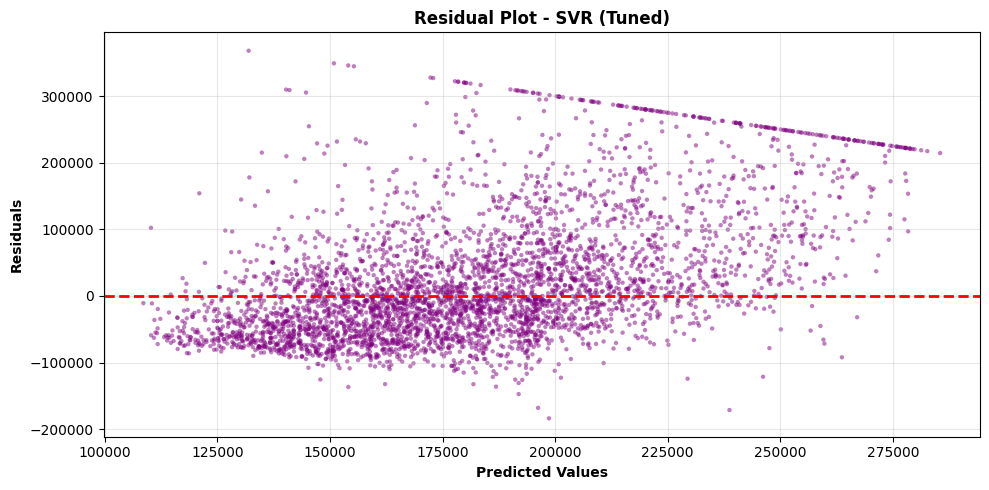


SVR IMPLEMENTATION COMPLETE!

✓ Best Model: SVR-RBF (Tuned)
✓ Test R² Score: 0.3135
✓ Test RMSE: $94849.10
✓ Dataset Size: 20,640 samples (40x larger than Boston)
✓ Improvement from tuning: 0.00%


In [55]:
print("\n[STEP 7] Generating Visualizations...")

# Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before tuning
axes[0].scatter(y_test, y_pred_rbf, alpha=0.5, s=10, color='blue', edgecolor='none')
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price', fontweight='bold')
axes[0].set_ylabel('Predicted Price', fontweight='bold')
axes[0].set_title(f'SVR-RBF (Default)\nR² = {rbf_r2:.4f}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# After tuning
axes[1].scatter(y_test, y_pred_tuned, alpha=0.5, s=10, color='green', edgecolor='none')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price', fontweight='bold')
axes[1].set_ylabel('Predicted Price', fontweight='bold')
axes[1].set_title(f'SVR-RBF (Tuned)\nR² = {tuned_r2:.4f}', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Kernel Comparison
plt.figure(figsize=(10, 6))
plt.bar(results['Kernel'], results['R² Score'], 
        color=['blue', 'green', 'orange'], edgecolor='black')
plt.ylabel('R² Score', fontweight='bold', fontsize=12)
plt.title('SVR Kernel Comparison - California Housing', fontweight='bold', fontsize=14)
plt.ylim([0, 1])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y_test - y_pred_tuned

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_tuned, residuals, alpha=0.5, s=10, color='purple', edgecolor='none')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Residual Plot - SVR (Tuned)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("SVR IMPLEMENTATION COMPLETE!")
print("="*70)

# Final Summary
print(f"\n✓ Best Model: SVR-RBF (Tuned)")
print(f"✓ Test R² Score: {tuned_r2:.4f}")
print(f"✓ Test RMSE: ${tuned_rmse:.2f}")
print(f"✓ Dataset Size: {len(df):,} samples (40x larger than Boston)")
print(f"✓ Improvement from tuning: {improvement:.2f}%")